<a href="https://colab.research.google.com/github/Sardaar2003/GFG_Data_Science_Course_Assignment/blob/main/Project_Titanic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing all the necessary libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(12, 10)})

## Loading the Dataset

In [2]:
data=pd.read_csv('titanic_data.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Types of Features :

Categorical - Sex, and Embarked.

Continuous - Age, Fare

Discrete - SibSp, Parch.

Alphanumeric - Cabin

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Numerical Data Analysis

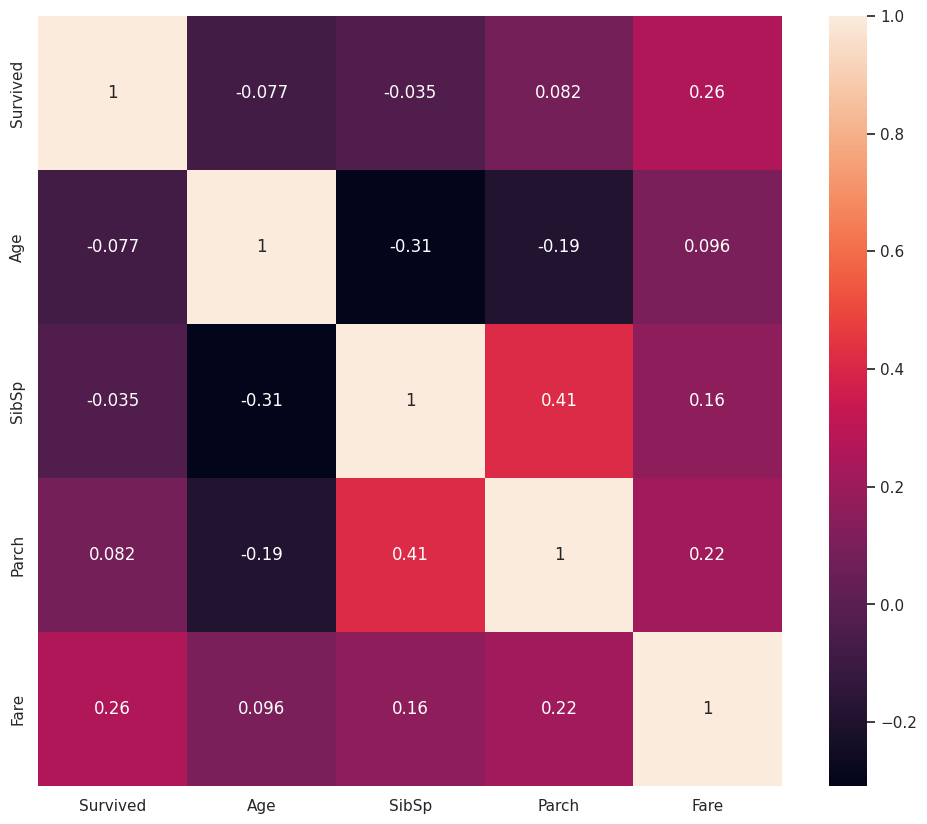

In [6]:
heatmap=sns.heatmap(data[['Survived','Age','SibSp','Parch','Fare']].corr(),annot=True)

Conclusion :

Only Fare feature seems to have a significative correlation with the survival probability.


## sibsp - Number of siblings / spouses aboard the Titanic

In [7]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

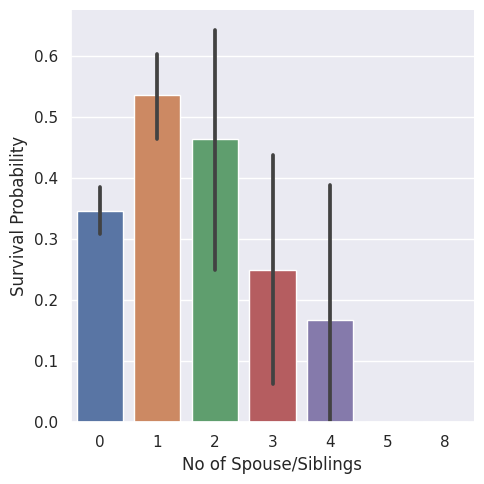

In [8]:
g=sns.catplot(x='SibSp',y='Survived',data=data,kind='bar')
g.set_axis_labels('No of Spouse/Siblings','Survival Probability')

It seems that passengers having a lot of siblings/spouses have less chance to survive.


Single passengers (0 SibSP) or with two other persons (SibSP 1 or 2) have more chance to survive.

## Age Visualisation

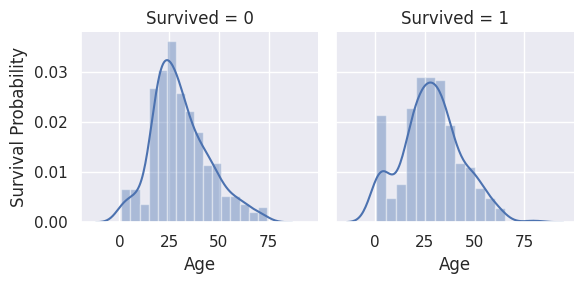

In [9]:
age_vis=sns.FacetGrid(data,col='Survived')
age_vis=age_vis.map(sns.distplot,'Age').set_axis_labels('Age','Survival Probability')

Age distribution seems to be a tailed distribution, maybe a gaussian distribution.

We notice that age distributions are not the same in the survived and not survived subpopulations. Indeed, there is a peak corresponding to young passengers, that have survived. We also see that passengers between 60-80 have less survived.

So, even if "Age" is not correlated with "Survived", we can see that there is age categories of passengers that of have more or less chance to survive.

It seems that very young passengers have more chance to survive.

## Sex

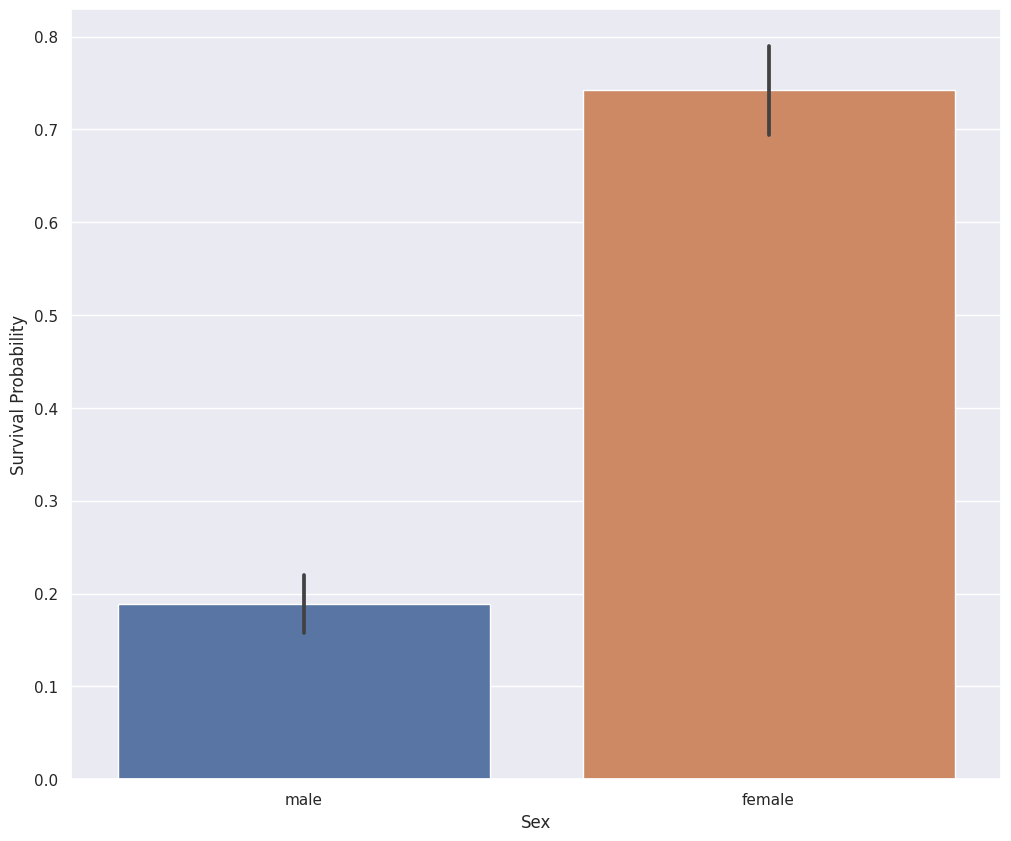

In [10]:
sex_plot=sns.barplot(x='Sex',y='Survived',data=data).set_ylabel('Survival Probability')

In [11]:
data[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


It is clearly obvious that Male have less chance to survive than Female. So Sex, might play an important role in the prediction of the survival. For those who have seen the Titanic movie (1997), I am sure, we all remember this sentence during the evacuation - Women and children first

## PClass

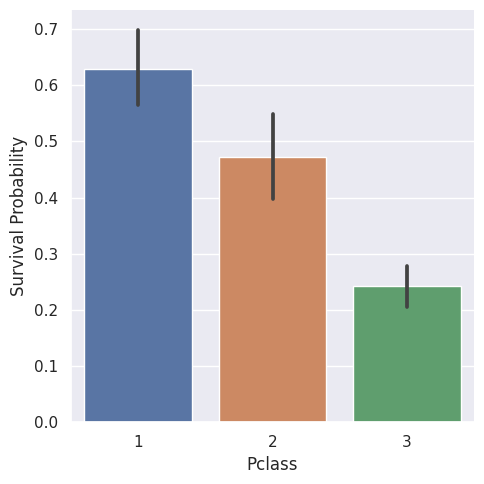

In [12]:
pclass=sns.catplot(x='Pclass',y='Survived',data=data,kind='bar').set_ylabels('Survival Probability')

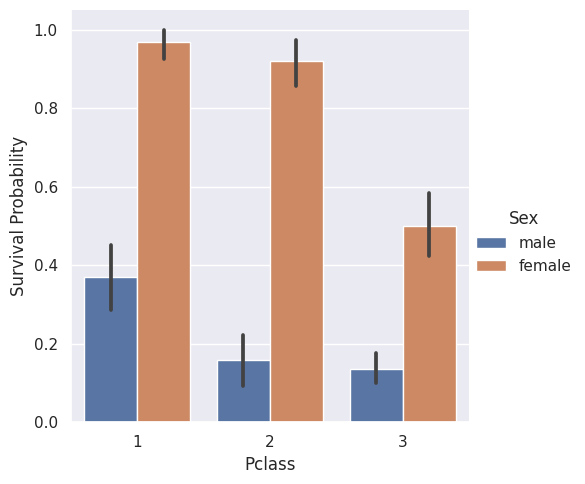

In [13]:
pclass=sns.catplot(x='Pclass',y='Survived',data=data,kind='bar',hue='Sex').set_ylabels('Survival Probability')

## Embarked

In [14]:
data['Embarked'].isnull().sum()

2

In [15]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
data['Embarked']=data['Embarked'].fillna('S')

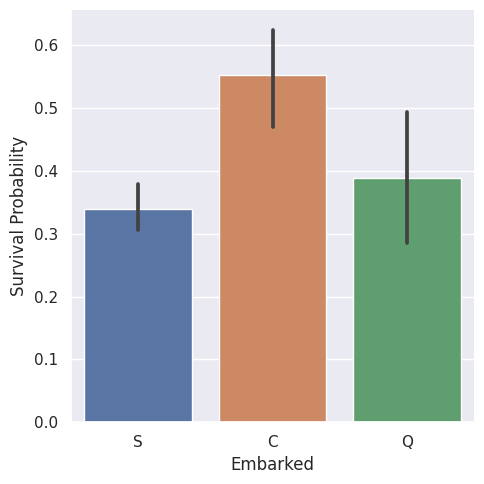

In [17]:
sns.catplot(x='Embarked',y='Survived',data=data,kind='bar').set_ylabels('Survival Probability')

## Preparing the Data

In [24]:
data=pd.read_csv('titanic_data.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
mean=data['Age'].mean()
std=data['Age'].std()

In [28]:
is_null=data['Age'].isnull().sum()

In [29]:
print(mean," ",std," ",is_null)

29.69911764705882   14.526497332334042   177


In [35]:
rand_age=np.random.randint(mean-std,mean+std,size=is_null)

In [38]:
a=data['Age'].copy()

In [42]:
a[np.isnan(a)]=rand_age

In [43]:
a.isnull().sum()

0

In [44]:
data['Age']=a

In [45]:
data['Age'].isnull().sum()

0

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [47]:
data['Embarked']=data['Embarked'].fillna('S')

In [48]:
data.drop(['PassengerId','Cabin','Ticket','Name'],axis=1,inplace=True)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [50]:
genders={'male':0,'female':1}
data['Sex']=data['Sex'].map(genders)

In [51]:
ports={'S':0,'C':1,'Q':2}
data['Embarked']=data['Embarked'].map(ports)

In [52]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [54]:
X=data.drop('Survived',axis=1)
Y=data['Survived']

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.5,random_state=23)

## Scaling

In [61]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

## Classification

In [60]:
log_reg=LogisticRegression()
dec_tree=DecisionTreeClassifier()
knn_class=KNeighborsClassifier(5)
rf_class=RandomForestClassifier(n_estimators=10000)
svc_class=SVC()

In [62]:
log_reg.fit(x_train,y_train)
dec_tree.fit(x_train,y_train)
knn_class.fit(x_train,y_train)
rf_class.fit(x_train,y_train)
svc_class.fit(x_train,y_train)

SVC()

In [63]:
log_pred=log_reg.predict(x_test)
dec_pred=dec_tree.predict(x_test)
knn_pred=knn_class.predict(x_test)
rf_pred=rf_class.predict(x_test)
svc_pred=svc_class.predict(x_test)

In [65]:
log_acc=accuracy_score(y_test,log_pred)
dec_acc=accuracy_score(y_test,dec_pred)
knn_acc=accuracy_score(y_test,knn_pred)
rf_acc=accuracy_score(y_test,rf_pred)
svc_acc=accuracy_score(y_test,svc_pred)

In [69]:
print('Logisitc Regression Accuracy : ',round(log_acc*100,2))
print('Decision Tree Classifier Accuracy : ',round(dec_acc*100,2))
print('K Neighbors Classifier Accuracy : ',round(knn_acc*100,2))
print('Random Forest Classifier Accuracy : ',round(rf_acc*100,2))
print('Support Vector Machine Classifier Accuracy : ',round(svc_acc*100,2))

Logisitc Regression Accuracy :  77.35
Decision Tree Classifier Accuracy :  76.23
K Neighbors Classifier Accuracy :  82.06
Random Forest Classifier Accuracy :  81.17
Support Vector Machine Classifier Accuracy :  79.6
